In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import time
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [69]:
train_all = pd.read_csv('train.csv')
test_all = pd.read_csv('test.csv')

In [70]:
train_data, valid_data = train_test_split(train_all, test_size=0.2, random_state=42)

# どの特徴が故障に影響しやすいのかを分析する

<Figure size 432x288 with 0 Axes>

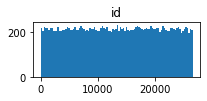

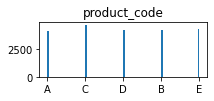

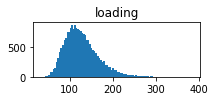

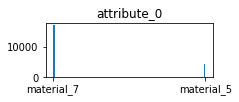

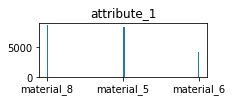

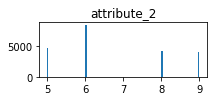

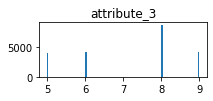

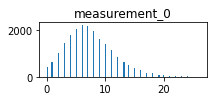

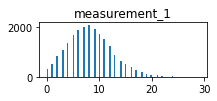

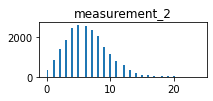

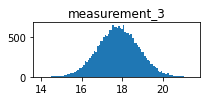

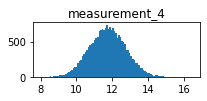

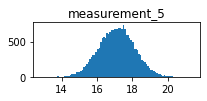

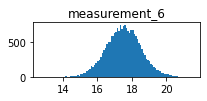

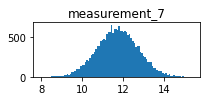

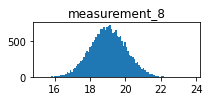

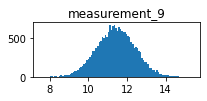

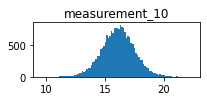

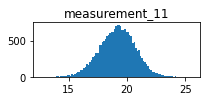

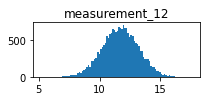

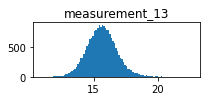

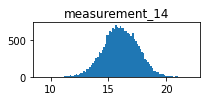

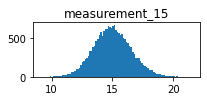

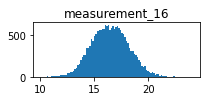

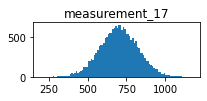

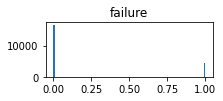

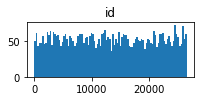

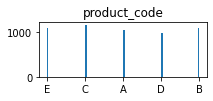

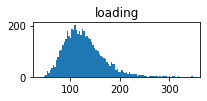

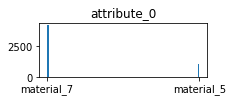

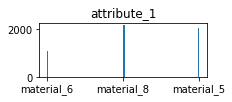

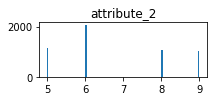

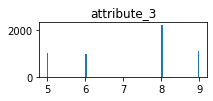

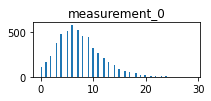

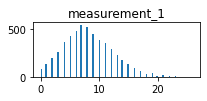

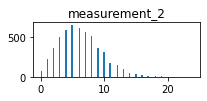

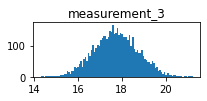

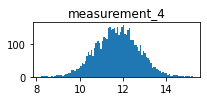

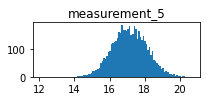

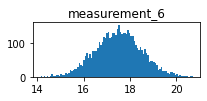

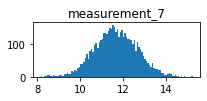

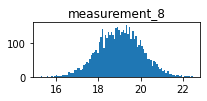

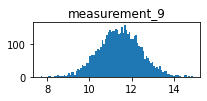

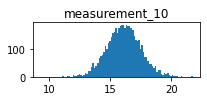

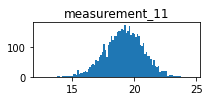

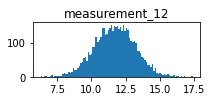

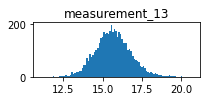

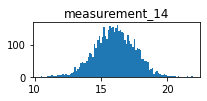

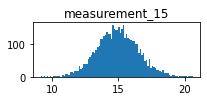

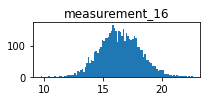

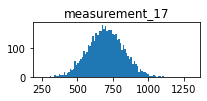

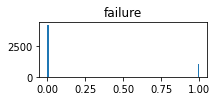

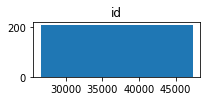

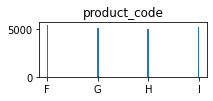

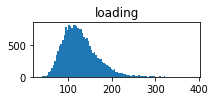

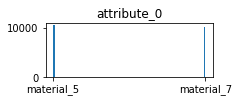

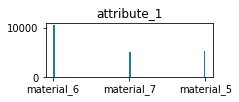

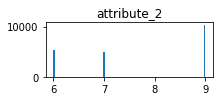

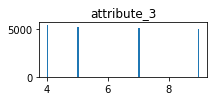

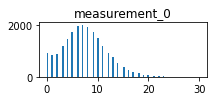

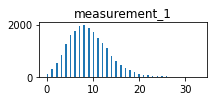

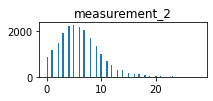

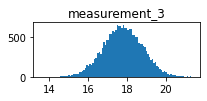

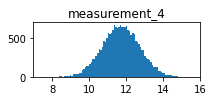

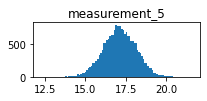

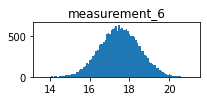

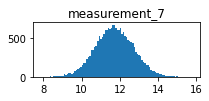

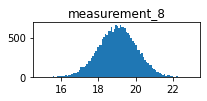

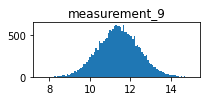

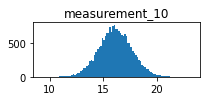

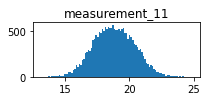

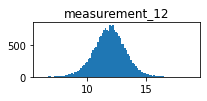

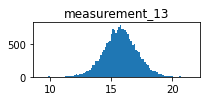

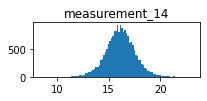

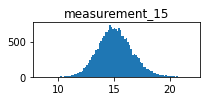

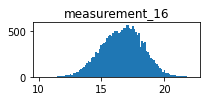

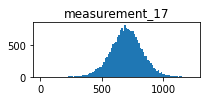

In [71]:
# 各特徴慮のヒストグラムを確認
datasets = [train_data, valid_data, test_all]

plt.figure(figsize=(6, 4))
for dataset in datasets:
    for col in dataset.columns:
        plt.figure(figsize=(3, 1))
        plt.title(col)
        plt.hist(dataset[col], bins=100)
        plt.show()
        plt.close()

In [72]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data["Total"]>0]

,Total,Percent
measurement_17,1837,0.086423
measurement_16,1699,0.079930
measurement_15,1623,0.076355
measurement_14,1496,0.070380
measurement_13,1401,0.065911
measurement_12,1315,0.061865
measurement_11,1153,0.054244
measurement_10,1042,0.049021
measurement_9,972,0.045728
measurement_8,852,0.040083


In [73]:
for dataset in datasets:
  dataset.dropna(inplace=True)
  # for col in dataset.columns:
  #   if dataset[col].isnull().sum()>0:
  #     dataset.drop(col, axis=1, inplace=True)
      # dataset[col].fillna(dataset[col].mean(), inplace=True)
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data["Total"]>0]

,Total,Percent


In [74]:
# カテゴリ変数を数値変数に変換
train_data = pd.get_dummies(train_data)
train_data.info()
# test_all = pd.get_dummies(test_all)

# full_dataset = pd.concat([train_X, test_all])
# full_dataset = pd.get_dummies(full_dataset)
# train_X = full_dataset.iloc[train_X.index]
# test_all = full_dataset.iloc[test_all.index]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9781 entries, 13904 to 23654
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9781 non-null   int64  
 1   loading                 9781 non-null   float64
 2   attribute_2             9781 non-null   int64  
 3   attribute_3             9781 non-null   int64  
 4   measurement_0           9781 non-null   int64  
 5   measurement_1           9781 non-null   int64  
 6   measurement_2           9781 non-null   int64  
 7   measurement_3           9781 non-null   float64
 8   measurement_4           9781 non-null   float64
 9   measurement_5           9781 non-null   float64
 10  measurement_6           9781 non-null   float64
 11  measurement_7           9781 non-null   float64
 12  measurement_8           9781 non-null   float64
 13  measurement_9           9781 non-null   float64
 14  measurement_10          9781 non-nu

In [75]:
valid_data = pd.get_dummies(valid_data)
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 24141 to 24234
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2402 non-null   int64  
 1   loading                 2402 non-null   float64
 2   attribute_2             2402 non-null   int64  
 3   attribute_3             2402 non-null   int64  
 4   measurement_0           2402 non-null   int64  
 5   measurement_1           2402 non-null   int64  
 6   measurement_2           2402 non-null   int64  
 7   measurement_3           2402 non-null   float64
 8   measurement_4           2402 non-null   float64
 9   measurement_5           2402 non-null   float64
 10  measurement_6           2402 non-null   float64
 11  measurement_7           2402 non-null   float64
 12  measurement_8           2402 non-null   float64
 13  measurement_9           2402 non-null   float64
 14  measurement_10          2402 non-nu

In [76]:
valid_X = valid_X[train_X.columns]
valid_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 24141 to 24234
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loading                 2402 non-null   float64
 1   attribute_2             2402 non-null   int64  
 2   attribute_3             2402 non-null   int64  
 3   measurement_0           2402 non-null   int64  
 4   measurement_1           2402 non-null   int64  
 5   measurement_2           2402 non-null   int64  
 6   measurement_3           2402 non-null   float64
 7   measurement_4           2402 non-null   float64
 8   measurement_5           2402 non-null   float64
 9   measurement_6           2402 non-null   float64
 10  measurement_7           2402 non-null   float64
 11  measurement_8           2402 non-null   float64
 12  measurement_9           2402 non-null   float64
 13  measurement_10          2402 non-null   float64
 14  measurement_11          2402 non-nu

In [77]:
test_all = pd.get_dummies(test_all)
test_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9590 entries, 0 to 20774
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9590 non-null   int64  
 1   loading                 9590 non-null   float64
 2   attribute_2             9590 non-null   int64  
 3   attribute_3             9590 non-null   int64  
 4   measurement_0           9590 non-null   int64  
 5   measurement_1           9590 non-null   int64  
 6   measurement_2           9590 non-null   int64  
 7   measurement_3           9590 non-null   float64
 8   measurement_4           9590 non-null   float64
 9   measurement_5           9590 non-null   float64
 10  measurement_6           9590 non-null   float64
 11  measurement_7           9590 non-null   float64
 12  measurement_8           9590 non-null   float64
 13  measurement_9           9590 non-null   float64
 14  measurement_10          9590 non-null  

In [78]:
for col in train_data.columns:
  if not col in test_all.columns:
    print(col + 'という列は存在しません')
    test_all[col] = 0
test_all = test_all[train_data.columns]
test_all.info()

failureという列は存在しません
product_code_Aという列は存在しません
product_code_Bという列は存在しません
product_code_Cという列は存在しません
product_code_Dという列は存在しません
product_code_Eという列は存在しません
attribute_1_material_8という列は存在しません
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9590 entries, 0 to 20774
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9590 non-null   int64  
 1   loading                 9590 non-null   float64
 2   attribute_2             9590 non-null   int64  
 3   attribute_3             9590 non-null   int64  
 4   measurement_0           9590 non-null   int64  
 5   measurement_1           9590 non-null   int64  
 6   measurement_2           9590 non-null   int64  
 7   measurement_3           9590 non-null   float64
 8   measurement_4           9590 non-null   float64
 9   measurement_5           9590 non-null   float64
 10  measurement_6           9590 non-null   float64
 11  measurement_7  

In [79]:
train_data = train_data.drop(["id"], axis=1)
valid_data = valid_data.drop(["id"], axis=1)
test_all = test_all.drop(["id", "failure"], axis=1)

In [80]:
train_X, train_y = train_data.drop(['failure'], axis=1), train_data['failure']
valid_X, valid_y = valid_data.drop(['failure'], axis=1), valid_data['failure']
len(train_y)

9781

In [81]:
len(train_X)

9781

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

lr_model = LogisticRegression()

lr_model.fit(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [83]:
predictions = lr_model.predict(valid_X)

score = lr_model.score(valid_X, valid_y)
score

0.8114071606994172

In [84]:
y_pred = lr_model.predict(test_all)


In [86]:
prediction = pd.DataFrame(y_pred, columns=['failure'])

prediction["id"] = pd.read_csv('./test.csv')["id"]

prediction.to_csv("./submit.csv", index=False, header=True)